In [1]:
from lionagi.core.message import System, Instruction
from lionagi.core.executor.graph_executor import GraphExecutor
from lionagi.core.engine.instruction_map_engine import InstructionMapEngine
from lionagi.core.agent.base_agent import BaseAgent

In [2]:
# let us use a simple calculator as an example
# in this example, we will have two sets of instructions with different step 1 but same step 2.
# given two numbers, the first step would be calculating both sum and diff in parallel
# and second step would be choosing between times or plus based on the sign of the first step

system = System(
    "You are asked to perform as a calculator. Return only a numeric value, i.e. int or float, no text."
)

instruct1 = Instruction(
    instruction={
        "sum the absolute values": "provided with 2 numbers, return the sum of their absolute values. i.e. |x|+|y|",
    }
)

instruct2 = Instruction(
    instruction={
        "diff the absolute values": "provided with 2 numbers, return the difference of absolute values. i.e. |x|-|y|",
    }
)

instruct3 = Instruction(
    instruction={
        "if previous response is positive": "times 2. i.e. *2",
        "else": "plus 2. i.e. +2",
    }
)

In [3]:
graph_multi = GraphExecutor()
graph_multi.add_node(system)
graph_multi.add_node(instruct1)
graph_multi.add_node(instruct2)
graph_multi.add_node(instruct3)

graph_multi.add_edge(system, instruct1)
graph_multi.add_edge(system, instruct2)
graph_multi.add_edge(instruct1, instruct3)
graph_multi.add_edge(instruct2, instruct3)

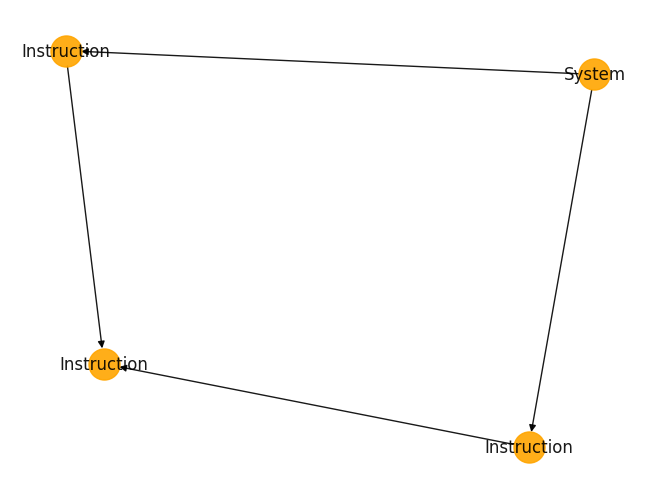

In [4]:
graph_multi.display()

In [5]:
## output_parser parameter: agent self
## output_parser return: the expected result that should be returned after execution
def output_parser(agent):
    ## return all message dataframe in all branches
    output = []
    for branch in agent.executable.branches.values():
        output.append(branch.to_df())
    return output


executable = InstructionMapEngine()

In [6]:
calculator = BaseAgent(
    structure=graph_multi, executable=executable, output_parser=output_parser
)

In [7]:
result = await calculator.execute(context={"x": 2, "y": 3})

------------------Welcome: system--------------------


system: You are asked to perform as a calculator. Return only a numeric value, i.e. int or float, no text.

user: {"sum the absolute values": "provided with 2 numbers, return the sum of their absolute values. i.e. |x|+|y|"}

user: {"diff the absolute values": "provided with 2 numbers, return the difference of absolute values. i.e. |x|-|y|"}

assistant 31b135ce3ab2a50f58ea5aa7a1a4a29e: {"x": -3, "y": 4}

-----------------------------------------------------


assistant 18cd4d273cd00bf04334e50a5c8371ef: {"role": "assistant", "content": ""}

-----------------------------------------------------


user: {"if previous response is positive": "times 2. i.e. *2", "else": "plus 2. i.e. +2"}

user: {"if previous response is positive": "times 2. i.e. *2", "else": "plus 2. i.e. +2"}

assistant 31b135ce3ab2a50f58ea5aa7a1a4a29e: 14

-----------------------------------------------------


assistant 18cd4d273cd00bf04334e50a5c8371ef: Understood. Please provide the two numbers.

-----------------------------------------------------


In [8]:
result[0]

,ln_id,message_type,timestamp,role,content,metadata,sender,recipient
0,0c442a440aa34300b3531ae64790485e,System,2024-05-24T00:41:57.150440,system,{'system_info': 'You are asked to perform as a...,{'last_updated': {'recipient': '2024-05-24T00:...,system,31b135ce3ab2a50f58ea5aa7a1a4a29e
1,e3e305731eb62712b83902c677648f64,Instruction,2024-05-24T00:42:54.988742,user,{'instruction': {'sum the absolute values': 'p...,{'last_updated': {'sender': '2024-05-24T00:42:...,user,31b135ce3ab2a50f58ea5aa7a1a4a29e
2,eb47980f40ccf7db5f852086f91280bc,AssistantResponse,2024-05-24T00:42:55.988001,assistant,"{'assistant_response': '{""x"": -3, ""y"": 4}'}",{'last_updated': {'sender': '2024-05-24T00:42:...,31b135ce3ab2a50f58ea5aa7a1a4a29e,user
3,76cbc80a45e932a57a9213ac3f04be6e,Instruction,2024-05-24T00:42:56.823892,user,{'instruction': {'if previous response is posi...,{'last_updated': {'sender': '2024-05-24T00:42:...,user,31b135ce3ab2a50f58ea5aa7a1a4a29e
4,837e17defbd0ae22db6654e4c4b69af0,AssistantResponse,2024-05-24T00:42:57.511016,assistant,{'assistant_response': '14'},{'last_updated': {'sender': '2024-05-24T00:42:...,31b135ce3ab2a50f58ea5aa7a1a4a29e,user


In [9]:
result[1]

,ln_id,message_type,timestamp,role,content,metadata,sender,recipient
0,d090ded9d89e75a60ddf3c4db4a2d79f,System,2024-05-24T00:42:54.981206,system,{'system_info': 'You are asked to perform as a...,{'origin_ln_id': '0c442a440aa34300b3531ae64790...,31b135ce3ab2a50f58ea5aa7a1a4a29e,18cd4d273cd00bf04334e50a5c8371ef
1,fc182cff2a5f67ddf1195c38ee29d35f,Instruction,2024-05-24T00:42:55.214439,user,{'instruction': {'diff the absolute values': '...,{'last_updated': {'sender': '2024-05-24T00:42:...,user,18cd4d273cd00bf04334e50a5c8371ef
2,b45a0ca7d348f73d6c190123b3567d32,AssistantResponse,2024-05-24T00:42:56.412278,assistant,{'assistant_response': ''},{'last_updated': {'sender': '2024-05-24T00:42:...,18cd4d273cd00bf04334e50a5c8371ef,user
3,4c23fbb3ccdd617f1ed36970ba492558,Instruction,2024-05-24T00:42:56.825313,user,{'instruction': {'if previous response is posi...,{'last_updated': {'sender': '2024-05-24T00:42:...,user,18cd4d273cd00bf04334e50a5c8371ef
4,0abb1ea236bc554fc3f61b1ba585c3cd,AssistantResponse,2024-05-24T00:42:57.512460,assistant,{'assistant_response': 'Understood. Please pro...,{'last_updated': {'sender': '2024-05-24T00:42:...,18cd4d273cd00bf04334e50a5c8371ef,user


# Storing Structures

We currently support the storage of structures in Excel and Neo4j, enabling their reuse in future applications.

### Excel

In [10]:
graph_multi.to_excel("math_multi")  # dir = "structure_storage" (default)

### Neo4j

In [11]:
# initiate Neo4j Driver
uri = "bolt://localhost:7687"
user = "neo4j"
password = "12345678"
database = "neo4j"

from lionagi.integrations.storage.neo4j import Neo4j

neo4j = Neo4j(uri, user, password, database)

In [12]:
# structure_name is unique

await neo4j.store(graph_multi, structure_name="math_multi")